# Import 

In [1]:
import torch
import torch.nn as nn
from metrics import Cross_validation
from architecture import *
from dlc_practical_prologue import generate_pair_sets as load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Define the architectures and parameters

In [25]:
# List of the architectures you want to assess
architectures = [oO_Net,oO_Net,oO_Net,oO_Net,oO_Net,oO_Net,oO_Net]
# List of the arguments for each architecture
args = [[1],[2],[4],[6],[8],[10],[12]]
# Initialize the cross validation
mytest = Cross_validation(architectures,args,epochs=30,steps=5,runs=10) 

In [26]:
mytest.archi_names

['oO_Net (1)',
 'oO_Net (2)',
 'oO_Net (4)',
 'oO_Net (6)',
 'oO_Net (8)',
 'oO_Net (10)',
 'oO_Net (12)']

# Run the network

In [27]:
mytest.run_all(test=False,save_data="_Naive_embeded")

Architecture        Runs           Accuracy Train           Accuracy Validation      Time           
------------        ----           --------------           -------------------      ----           
oO_Net (1)          0              99.2                     96.2                     10.3           
oO_Net (1)          1              99.6                     97.0                     10.9           
oO_Net (1)          2              99.0                     97.2                     10.9           
oO_Net (1)          3              99.1                     97.8                     10.3           
oO_Net (1)          4              98.8                     96.8                     10.3           
oO_Net (1)          5              98.8                     96.0                     11.1           
oO_Net (1)          6              99.3                     98.0                     11.7           
oO_Net (1)          7              98.5                     95.8                     11.6  

Model predicted right number greater than the left


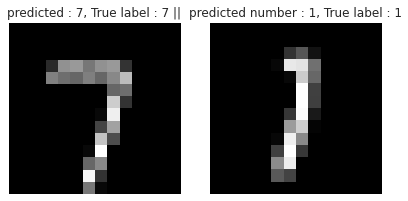

Model predicted right number greater than the left


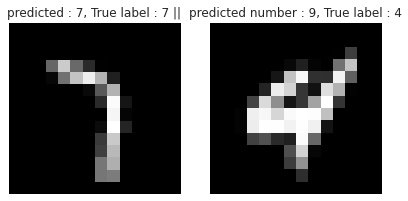

Model predicted left number greater than the right


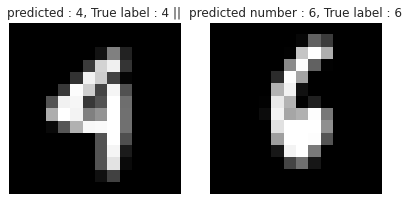

Model predicted left number greater than the right


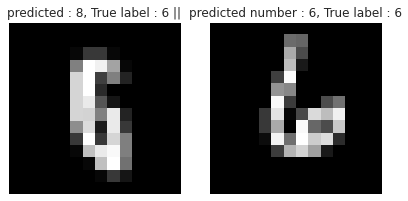

Model predicted right number greater than the left


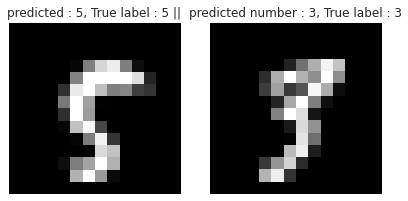

Model predicted left number greater than the right


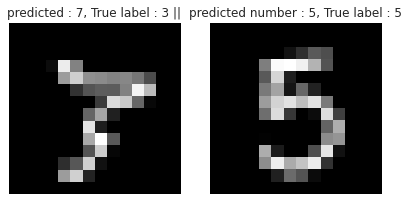

Model predicted left number greater than the right


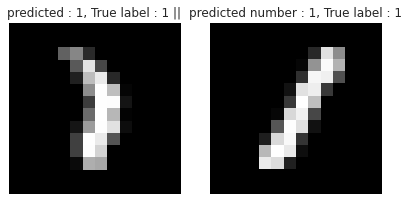

Model predicted right number greater than the left


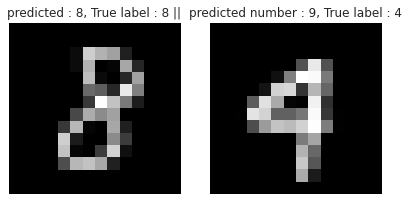

Model predicted left number greater than the right


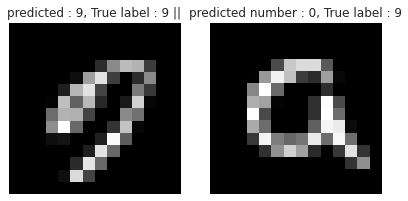

Model predicted right number greater than the left


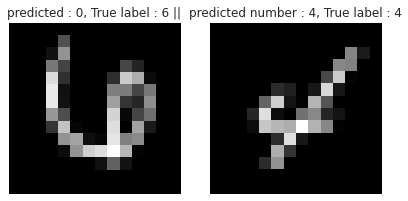

In [21]:
error_idx=5
for error_idx in range(0,10):
    mytest.plot_errors(error_idx)

# Visualize the number of parameters of each model

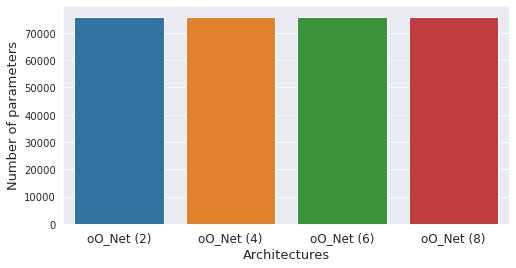

In [14]:
fig = plt.figure(figsize=[8,4])
sns.set_style("darkgrid")
mytest.plot_count_param(fig,[1,1,1])

# Visualize the spread of the accuracy

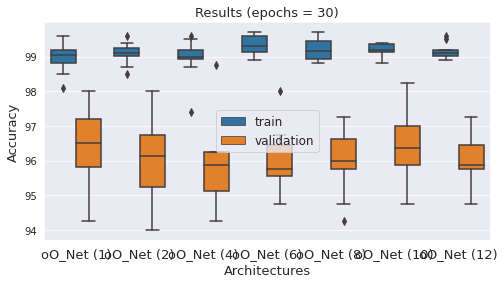

In [28]:
fig = plt.figure(figsize=[8,4])
sns.set_style("darkgrid")
mytest.plot_std(fig,[1,1,1],test=False)

# Compare the performances

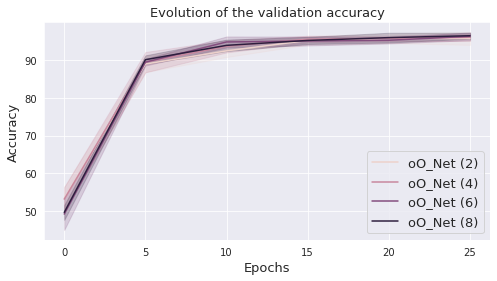

In [19]:
fig = plt.figure(figsize=[8,4])
sns.set_style("darkgrid")
mytest.plot_evolution_all(fig,[1,1,1],type_perf=1)

# Visualize the time performances

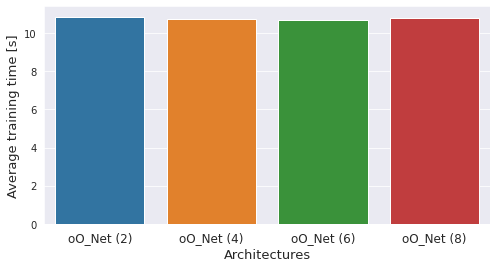

In [17]:
fig = plt.figure(figsize=[8,4])
sns.set_style("darkgrid")
mytest.plot_time_comparison(fig,[1,1,1])

# Let's plot all these graphs together

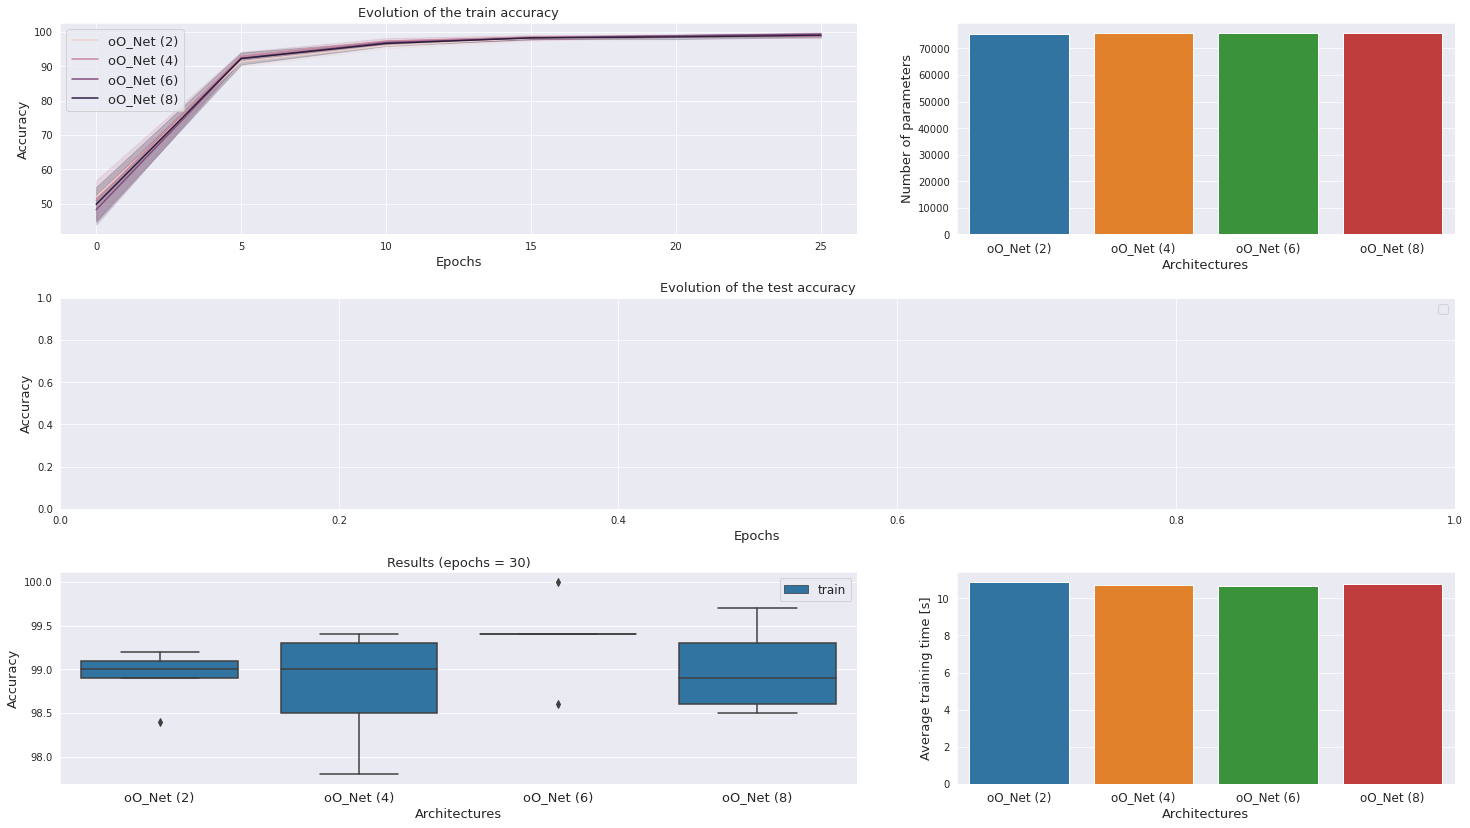

In [18]:
mytest.plot_full_comparison(test=True,save_folder="figures/")

## Remarks on oO_Net

Dropout in the Naive_Net part reduces overfitting significantly and increases performance by 1%. <br>
Dropout in MnistCNN decreases performance. <br>
Replacing MnistCNN by a Mnist ResNet decreases performance. <br>
SELU has no effect on performance and increases running time. <br>
weights_loss is good at [0.5, 0.5]. <br>
data_augmentation n'est pas pertinent. <br>
erreur plausible pour bcp. <br>
bcp de train donne un bon resultat, moyenne a 87.6 avec 80 epoch, a l'air de monter encore un peu. <br>
